In [2]:
#Import the sentiment_tweets3.csv from the current directory and load it in dataframe

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/NLP Day: Text Preprocessing/sentiment_tweets3.csv')


In [5]:
# Write data describe using dataframe
# Does the person have depression? 0 stands for NO and 1 stands for YES
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [6]:
df.describe()

,Index,label (depression result)
count,10314.000000,10314.000000
mean,491253.470525,0.224355
std,261688.134407,0.417177
min,106.000000,0.000000
25%,263019.250000,0.000000
50%,514988.000000,0.000000
75%,773521.500000,0.000000
max,802313.000000,1.000000


In [8]:
#check duplication
df.duplicated().sum()

0

In [10]:
# Missing values check
print(f'Missing values in train data:\n{df.isnull().sum()}')

Missing values in train data:
Index                        0
message to examine           0
label (depression result)    0
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [12]:
df['label (depression result)'].value_counts()

0    8000
1    2314
Name: label (depression result), dtype: int64

<Axes: >

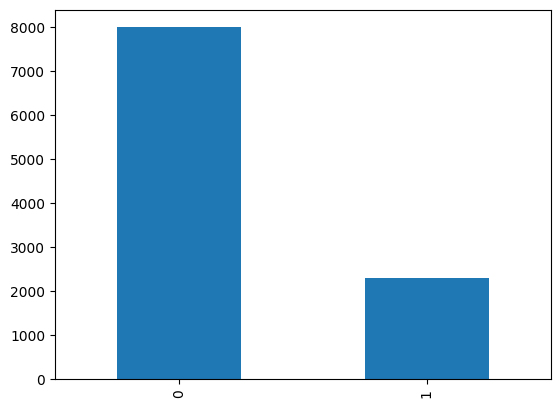

In [13]:
df['label (depression result)'].value_counts().plot(kind='bar')

In [14]:
#plot
import matplotlib.pyplot as plt
# NLP
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import re

# Warning
import warnings
warnings.filterwarnings('ignore')

**Cleaning Step: Removing Stopwords**


*Stopwords* are common words (e.g., "the," "and," "in") that are often removed in NLP because they:

1. Add little semantic value.
2. Increase dimensionality.
3. Consume unnecessary resources.
4. Dilute the importance of meaningful words.
5. Improve interpretability and focus on content.

*Semantics:*
Semantics refers to the meaning of words, phrases, or sentences in a language. In NLP, understanding and analyzing semantics are essential for tasks like sentiment analysis and machine translation.

*Word Cloud:*
A word cloud is a visual representation of text data, where words are displayed in varying sizes based on their frequency in the text. It provides a quick overview of key terms.


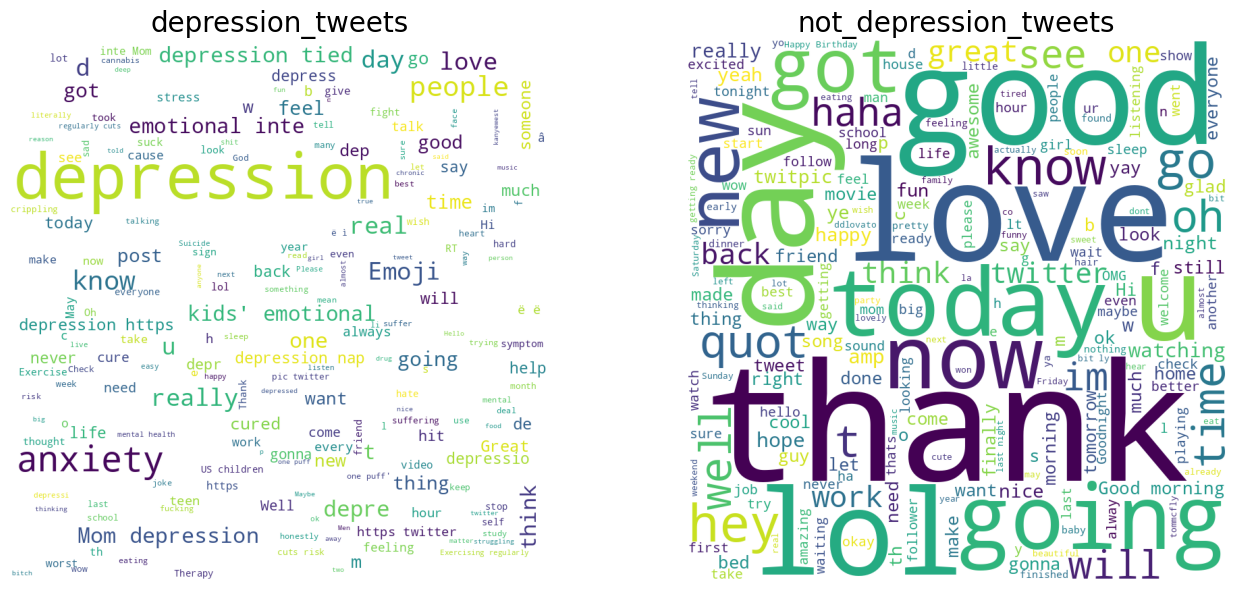

In [15]:
# Plotting wordclouds for both negative and positive tweets
stopwords = set(STOPWORDS)

# Removing 'user' word as it does not hold any importance in our context
stopwords.add('user')

depression_tweets = df['message to examine'][df['label (depression result)']==1].to_string()
wordcloud_depression = WordCloud(width = 800, height = 800,
                               background_color ='white', stopwords = stopwords,
                               min_font_size = 10).generate(depression_tweets)

not_depression_tweets = df['message to examine'][df['label (depression result)']==0].to_string()
wordcloud_not_depression = WordCloud(width = 800, height = 800,
                               background_color ='white', stopwords = stopwords,
                               min_font_size = 10).generate(not_depression_tweets)

# Plotting the WordCloud images
plt.figure(figsize=(14, 6), facecolor = None)

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_depression)
plt.axis("off")
plt.title('depression_tweets', fontdict={'fontsize': 20})

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_not_depression)
plt.axis("off")
plt.title('not_depression_tweets', fontdict={'fontsize': 20})

plt.tight_layout()
plt.show()

**Cleaning Step: Converting to Lowercase**

- **Uniformity**: Converting text to lowercase ensures uniformity in the dataset, as it treats uppercase and lowercase versions of the same word as identical. This avoids potential issues related to case sensitivity.

- **Stopword Matching**: When removing stopwords (common words like "the" or "and"), converting to lowercase ensures that stopwords are correctly identified and removed, regardless of their original case.

- **Consistency in Analysis**: For text analysis tasks like text classification, sentiment analysis, or word frequency analysis, converting to lowercase ensures that words are treated consistently, regardless of how they appear in the text.

- **Matching Keywords**: In keyword matching tasks, such as information retrieval or searching, converting both the search query and the text data to lowercase ensures that matches are not missed due to case differences.

- **Reduction of Vocabulary Size**: Converting to lowercase helps reduce the vocabulary size, making it easier to manage and analyze text data, as different cases of the same word are considered the same.


In [16]:
df['message_cleaned']=df['message to examine'].str.lower()
df.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder


In [17]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(words)

df['message_cleaned'] = df['message_cleaned'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,"
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga http://plurk.com/p/mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace!!! myspace.com/lookthunder


**Cleaning Step: Removing URLs using Regular Expressions (RegEx)**

Removing URLs can be crucial for text analysis as they often don't provide meaningful information and can introduce noise.
This step is important in tasks like sentiment analysis, where the sentiment of a tweet or review is more relevant than the URLs within it.

In [18]:
#Cleaning URLs
def clean_url(data):
    data=re.sub(r"((https:|http|ftp)?(:\/\/)?(www\.)?)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&\/\/=]*)",' ',data)
    return re.sub(r'/', ' / ', data)
df['message_cleaned'] = df['message_cleaned'].apply(lambda x: clean_url(x))
df.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,"
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace!!!



**Cleaning Step: Cleaning Punctuations**

- **Explanation**:
  - Punctuation marks (such as ".", ",", "?", "!" and more) serve to provide structure and meaning to sentences. However, in many NLP tasks, they are often removed to simplify text and focus on the underlying semantics and word relationships.

- **Reasons for Removing Punctuations**:
  - **Noise Reduction**: Punctuation marks may not contribute significant meaning in some NLP tasks. Removing them can reduce noise in the data.
  - **Simplifying Tokenization**: Punctuation marks can complicate tokenization, the process of breaking text into words or tokens. Removing them can make tokenization easier.
  - **Improved Text Analysis**: In tasks like sentiment analysis or text classification, the presence of punctuation may not affect the overall sentiment or category, so removing them can enhance analysis.
  - **Consistency**: Punctuation marks can vary in usage (e.g., "color" vs. "colour" or "it's" vs. "its"). Removing punctuation helps achieve consistency in text data.
  - **Simpler Text Representation**: In tasks where text is represented numerically (e.g., using word embeddings), punctuation marks are typically not considered, so removing them aligns with the representation.


In [20]:
#Cleaning Punctuations
import string
def clean_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))
df['message_cleaned']= df['message_cleaned'].apply(lambda x: clean_punctuations(x))
df.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


**Cleaning Step: Handling Repeating Characters (Repeating_char)**

- **Explanation**:
  - Repeating characters in text data, like "loooove" for "love," are simplified to improve text analysis, tokenization, and consistency.

- **Reasons for Handling Repeating Characters**:
  - **Text Simplification**: Reducing repeats simplifies text and enhances tokenization.
  - **Enhanced Text Analysis**: Removing excessive repeats improves analysis.
  - **Consistency**: Standardizes words with varying repeated characters.


In [21]:
#repeating_char
def clean_repeating_char(text):
    return re.sub(r"(.)\1\1+", r"\1\1", text)
df['message_cleaned'] = df['message_cleaned'].apply(lambda x: clean_repeating_char(x))
df.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [22]:
#Cleaning Numbers
def clean_numbers(data):
    return re.sub('[0-9]+', '', data)
df['message_cleaned'] = df['message_cleaned'].apply(lambda x: clean_numbers(x))
df.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


**Cleaning Step: Removing Hashtags (Remove_hashtag)**

- **Explanation**:
  - Hashtags, often used on social media platforms like Twitter, are words or phrases preceded by the "#" symbol. Removing hashtags can simplify text and facilitate the focus on the core content.

In [23]:
#remove_hashtag
def remove_hashtag(data):
    return re.sub('#[\w\d]+',' ' ,data)
df['message_cleaned'] = df['message_cleaned'].apply(lambda x: remove_hashtag(x))
df.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [24]:
def clean_username(data):
    return re.sub('@[^\s]+',' ', data)
df['message_cleaned'] = df['message_cleaned'].apply(lambda x: clean_username(x))
df.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [25]:
def clean_emoji(data):
    data = re.sub(r'<3', '<heart>', data)
    data = re.sub(r"[8:=;]['`\-]?[)d]+", '<smile>', data)
    data = re.sub(r"[8:=;]['`\-]?\(+", '<sad>', data)
    data = re.sub(r"[8:=;]['`\-]?[\/|l*]", '<neutral>', data)
    data = re.sub(r"[8:=;]['`\-]?p+", '<laugh>', data)
    return data
df['message_cleaned'] = df['message_cleaned'].apply(lambda x: clean_emoji(x))
df.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [26]:
def remove_images(tweet):
    cleaned_tweet = re.sub(r"pic\.twitter\.com/\S+",'', tweet)
    cleaned_tweet = re.sub("\w+(\.png|\.jpg|\.gif|\.jpeg)", " ", cleaned_tweet)
    return cleaned_tweet

df["message_cleaned"] = df["message_cleaned"].apply(remove_images)
df.head(10)

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace
5,624,so sleepy. good times tonight though,0,sleepy good times tonight though
6,701,"@SilkCharm re: #nbn as someone already said, d...",0,silkcharm re nbn someone already said fiber ho...
7,808,23 or 24ï¿½C possible today. Nice,0,ï¿½c possible today nice
8,1193,nite twitterville workout in the am -ciao,0,nite twitterville workout ciao
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0,dananner night darlin sweet dreams


In [28]:
!pip install language_tool_python
!pip install spellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 32.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966498 sha256=f8327fcace28b94aa4020c9f7474ba4ef594f6dcbc3dad86bd20d9bf42c6c591
  Stored in directory: /root/.cache/pip/wheels/6c/90/c3/eac248d8755b2a7343487a2087b4b29ad98f388c3c8c69c286
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7122 sha256=09a66753d11c911ab826b0050d9305b3382cbfc937fe6c175da0bbe408908993
  Stored in directory: /root/.cache/pip/wheels/63/19/2c/5e9f447f2533d457a1167c3e553f235e232b8a639e3f5fafab
  Created wheel for silpa_common: filename=silpa_common-0.3-py3-none-any.whl size=8465 sha256=bef976e1a6cea21f6b66ed1b85731ac5070175ed213f950c6cfb171c56722810
  Stored in directory: /root/.cache/pip/wheels/c0/72/43/0c7

In [29]:
import language_tool_python
import nltk
from nltk.tokenize import word_tokenize


tool = language_tool_python.LanguageTool('en-US')

INFO:language_tool_python.download_lt:Unzipping /tmp/tmp9hxs7_ze.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-5.7.zip to /root/.cache/language_tool_python.


In [30]:
df['corrected_tweets'] = df.apply(lambda l: tool.correct(l['message_cleaned']), axis=1)

In [32]:
df.head(10)

,Index,message to examine,label (depression result),message_cleaned,corrected_tweets
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much,Real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga,Reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen,Comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...,Lapcat need to send me accountant tomorrow odd...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace,Add MySpace
5,624,so sleepy. good times tonight though,0,sleepy good times tonight though,Sleepy good times tonight though
6,701,"@SilkCharm re: #nbn as someone already said, d...",0,silkcharm re nbn someone already said fiber ho...,Silkcharm re NBN someone already said fiber ho...
7,808,23 or 24ï¿½C possible today. Nice,0,ï¿½c possible today nice,Ï¿BC possible today nice
8,1193,nite twitterville workout in the am -ciao,0,nite twitterville workout ciao,Nite Twitter Blue workout ciao
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0,dananner night darlin sweet dreams,Dananner night Darwin sweet dreams


In [33]:
df.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
message_cleaned              0
corrected_tweets             0
dtype: int64

**Explanation:**


The Porter Stemmer is a widely used algorithm in natural language processing for reducing words to their root or base form. It helps in simplifying text and grouping words with similar meanings.


**How It Works**:
The Porter Stemmer algorithm applies a series of rules to remove common prefixes and suffixes from words, with the goal of converting them to their root form. For example, "running" becomes "run," "better" becomes "good," and "cats" becomes "cat."

In [34]:
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [35]:
nltk.download('punkt')
nltk.download('wordnet', '/root/nltk_data/')
!unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data/...


Archive:  /root/nltk_data/corpora/wordnet.zip
   creating: /root/nltk_data/corpora/wordnet/
  inflating: /root/nltk_data/corpora/wordnet/lexnames  
  inflating: /root/nltk_data/corpora/wordnet/data.verb  
  inflating: /root/nltk_data/corpora/wordnet/index.adv  
  inflating: /root/nltk_data/corpora/wordnet/adv.exc  
  inflating: /root/nltk_data/corpora/wordnet/index.verb  
  inflating: /root/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /root/nltk_data/corpora/wordnet/data.adj  
  inflating: /root/nltk_data/corpora/wordnet/index.adj  
  inflating: /root/nltk_data/corpora/wordnet/LICENSE  
  inflating: /root/nltk_data/corpora/wordnet/citation.bib  
  inflating: /root/nltk_data/corpora/wordnet/noun.exc  
  inflating: /root/nltk_data/corpora/wordnet/verb.exc  
  inflating: /root/nltk_data/corpora/wordnet/README  
  inflating: /root/nltk_data/corpora/wordnet/index.sense  
  inflating: /root/nltk_data/corpora/wordnet/data.noun  
  inflating: /root/nltk_data/corpora/wordnet/data.adv  


Lemmatizer

Explanation:
A lemmatizer is a tool or algorithm used in natural language processing (NLP) to reduce words to their base or dictionary form, known as the lemma. It helps in simplifying text and grouping words with similar meanings.
How It Works:
Unlike stemming, which trims the ends of words without considering their grammatical meaning, lemmatization takes into account the word's part of speech and context to find its root form. For example, "running" becomes "run," "better" becomes "good," and "cats" becomes "cat."

Stemmer:
Simplifies words by removing prefixes or suffixes.
Faster and simpler.
May result in non-words.
Used in tasks where speed matters more than precision.
Lemmatizer:
Finds base forms considering grammar.
More accurate but slower.
Always results in valid words.
Used when preserving meaning and grammar is crucial.

In [2]:
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

def lemmatizeRows(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['lemmatizedRows'] = df['corrected_tweets'].apply(lemmatizeRows)

df.head()

NameError: name 'nltk' is not defined

In [38]:
stemmer = PorterStemmer()

def stemRows(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df['stemmedRows'] = df['lemmatizedRows'].apply(stemRows)

df.head()

,Index,message to examine,label (depression result),message_cleaned,corrected_tweets,lemmatizedRows,stemmedRows
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much,Real good moment miss much,Real good moment miss much,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga,Reading manga,Reading manga,read manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen,Comeagainjen,Comeagainjen,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...,Lapcat need to send me accountant tomorrow odd...,Lapcat need to send me accountant tomorrow odd...,lapcat need to send me account tomorrow oddli ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace,Add MySpace,Add MySpace,add myspac


**Count Vectorizers vs. TF-IDF (Term Frequency-Inverse Document Frequency)**

- **Count Vectorizers**:
  - **Operation**: Count vectorizers convert text data into numerical vectors by counting the frequency of each word in the document. Each word becomes a feature, and its count in the document represents its value in the vector.
  - **Use**: Count vectorizers are straightforward and efficient for text classification and clustering tasks. They capture the frequency of words but do not consider their importance in the entire corpus.
  - **Strengths**: They are easy to understand, computationally efficient, and work well for tasks where word frequency matters.
  - **Weaknesses**: They may not handle the varying importance of words effectively, and common words (stopwords) can dominate the vector.

- **TF-IDF (Term Frequency-Inverse Document Frequency)**:
  - **Operation**: TF-IDF is a statistical measure that evaluates the importance of a word within a document relative to its frequency in the entire corpus. It considers both term frequency (TF) and inverse document frequency (IDF) to assign values to words.
  - **Use**: TF-IDF is suitable for tasks where word importance and context are essential, such as information retrieval, document ranking, and content recommendation.
  - **Strengths**: It captures the importance of words in the corpus, downweights common words, and highlights unique terms in a document.
  - **Weaknesses**: It can be computationally more intensive than simple count vectorization, and it may require a larger corpus to work effectively.

In summary, the choice between count vectorizers and TF-IDF depends on the specific NLP task and the desired focus. Count vectorizers are simple and efficient but may not capture word importance well. TF-IDF, on the other hand, considers word importance and context, making it suitable for tasks where semantic meaning and uniqueness matter.


**When to Use Count Vectorizers and When to Use TF-IDF**

- **Use Count Vectorizers When**:

  1. **Word Frequency Matters**: If your task focuses on identifying the significance of individual words based on their frequency in documents, count vectorization is suitable.
  
  2. **Simplicity and Efficiency**: Count vectorizers are computationally efficient and simple to implement, making them a good choice for quick text representation.
  
  3. **Text Classification and Clustering**: Count vectorizers are commonly used in tasks like text classification and clustering, where you want to group documents based on word occurrence patterns.
  
  4. **Exploratory Data Analysis**: Count vectorization provides insights into the most common words and phrases during the initial exploration of text data.

- **Use TF-IDF When**:

  1. **Word Importance and Context Matter**: TF-IDF captures the importance of words based on their occurrence in the entire corpus while considering their context within documents. It downweights common words and highlights unique ones.
  
  2. **Information Retrieval**: TF-IDF is particularly useful for tasks related to information retrieval, document ranking, and content recommendation. It helps identify relevant documents for search queries.
  
  3. **Semantic Meaning**: If your goal is to understand the semantic meaning of words and phrases in a document, TF-IDF provides better insights than simple word frequency.
  
  4. **Content Recommendation**: TF-IDF is often used in recommendation systems to suggest relevant content to users based on their preferences and document content.

Your choice between count vectorization and TF-IDF should align with your specific task objectives and data characteristics.



In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

Vectorizer = TfidfVectorizer()

dataVectorized = Vectorizer.fit_transform(df['corrected_tweets'])

dataVectorized.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

*Bag of Words (BoW)**

- **Explanation**:
  - Bag of Words (BoW) is a common technique in natural language processing (NLP) used to represent text data as a collection of words without considering grammar or word order. It treats each document as a "bag" of words, where word frequency is the primary focus.

- **How It Works**:
  - BoW represents text by creating a vocabulary of all unique words in a corpus. It then counts the frequency of each word in a document and creates a numerical vector where each dimension corresponds to a word in the vocabulary, and the value represents the word's frequency in the document.

- **Use Cases**:
  - BoW is used for various NLP tasks, including document classification, sentiment analysis, and information retrieval, where word frequency or presence matters more than the context and semantics of the text.

- **Strengths**:
  - Simplicity: BoW is easy to understand and implement.
  - Efficiency: It is computationally efficient and works well with large text datasets.
  - Versatility: BoW can be used as a baseline representation for many text-based tasks.

- **Weaknesses**:
  - Loss of Context: BoW does not consider word order or the semantic meaning of words, resulting in a loss of contextual information.
  - Dimensionality: It can lead to high-dimensional data, especially for large vocabularies, which may require dimensionality reduction techniques.


| Technique                 | Operation                                               | Use Cases                                          | Strengths                                             | Weaknesses                                               |
|---------------------------|---------------------------------------------------------|-----------------------------------------------------|-------------------------------------------------------|-----------------------------------------------------------|
| **Count Vectorization**   | Counts word occurrences in documents                    | - Text classification - Clustering                 | - Simplicity - Efficiency - Text classification        | - Ignores word importance - Does not consider context     |
| **TF-IDF**                | Considers word importance based on corpus and context   | - Information retrieval - Document ranking        | - Captures word importance - Downweights common words | - Computational overhead - Requires a larger corpus      |
| **Bag of Words (BoW)**    | Counts word occurrences in documents, no context       | - Text classification - Basic NLP tasks          | - Simplicity - Efficiency - Versatile                | - Loss of context - High dimensionality for large vocabularies |


In [40]:
dataVectorized.toarray().shape


(10314, 17958)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train ,y_test = train_test_split(dataVectorized, df['label (depression result)'], test_size=0.2,
                                                    stratify= df['label (depression result)']  , random_state=0)

In [42]:
X_train.shape , X_test.shape ,y_train.shape ,y_test.shape


((8251, 17958), (2063, 17958), (8251,), (2063,))

In [45]:
from sklearn.utils import compute_class_weight
import numpy as np
classWeights = compute_class_weight("balanced", classes = np.unique(df['label (depression result)']),
                                     y = df['label (depression result)'])

classWeights = dict(zip(np.unique(np.unique(df['label (depression result)'])), classWeights))

print(classWeights)

{0: 0.644625, 1: 2.228608470181504}


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [47]:
lr = LogisticRegression(class_weight=classWeights, random_state=0)

nb = MultinomialNB()

dt = DecisionTreeClassifier(class_weight=classWeights, random_state=0)

rf = RandomForestClassifier(class_weight=classWeights, random_state=0)

In [48]:
lr.fit(X_train.toarray(), y_train)

nb.fit(X_train.toarray(), y_train)

dt.fit(X_train.toarray(), y_train)

rf.fit(X_train.toarray(), y_train)


RandomForestClassifier(class_weight={0: 0.644625, 1: 2.228608470181504},
                       random_state=0)

In [49]:
lrScore = lr.score(X_train.toarray(), y_train)

nbScore = nb.score(X_train.toarray(), y_train)

dtScore = dt.score(X_train.toarray(), y_train)

rfScore = rf.score(X_train.toarray(), y_train)

In [50]:
colors = plt.cm.viridis(np.linspace(0, 1, 4))

models = ["Logistic Regression","Naive Bayes","Decision Trees", "Random Forests"]

Logistic Regression Train Accuracy score is : 99.75%

Naive Bayes Train Accuracy score is : 94.16%

Decision Tree Train Accuracy score is : 99.98%

Random Forest Train Accuracy score is : 99.98%


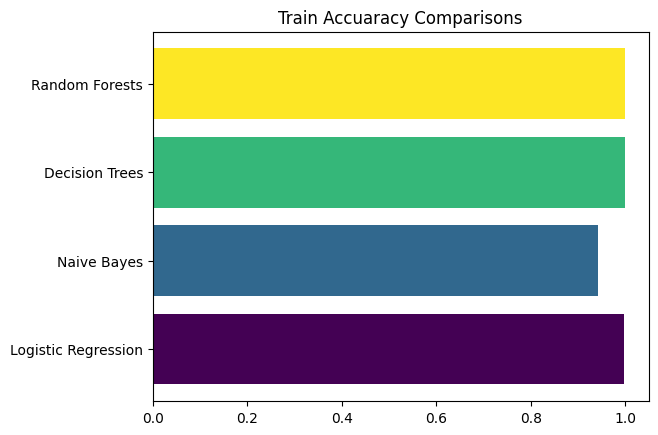

In [51]:
plt.barh(models, width = [lrScore, nbScore, dtScore, rfScore],
        color = colors)

plt.title("Train Accuaracy Comparisons")

print(f'Logistic Regression Train Accuracy score is : {round(lrScore * 100 ,2)}%')

print(f'\nNaive Bayes Train Accuracy score is : {round(nbScore * 100 , 2)}%')

print(f'\nDecision Tree Train Accuracy score is : {round(dtScore * 100 , 2)}%')

print(f'\nRandom Forest Train Accuracy score is : {round(rfScore * 100 , 2)}%')

In [52]:
lrScore = lr.score(X_test.toarray(), y_test)

nbScore = nb.score(X_test.toarray(), y_test)

dtScore = dt.score(X_test.toarray(), y_test)

rfScore = rf.score(X_test.toarray(), y_test)

Logistic Regression Test Accuracy score is : 99.32%

Naive Bayes Test Accuracy score is : 91.81%

Decision Tree Test Accuracy score is : 94.23%

Random Forest Test Accuracy score is : 94.76%


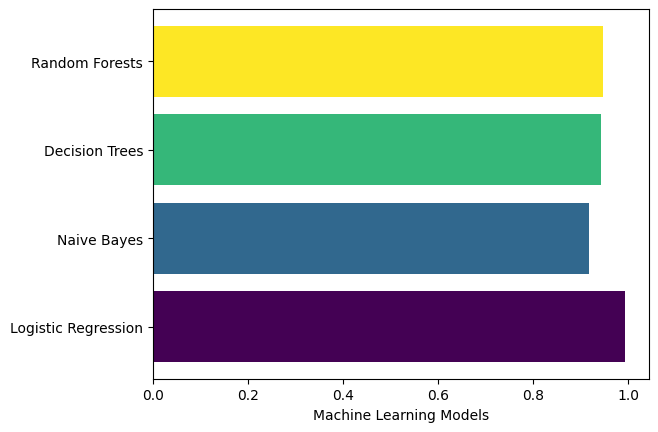

In [53]:
plt.barh(models, width = [lrScore, nbScore, dtScore, rfScore],
        color = colors)

plt.xlabel("Machine Learning Models")


print(f'Logistic Regression Test Accuracy score is : {round(lrScore * 100 ,2)}%')

print(f'\nNaive Bayes Test Accuracy score is : {round(nbScore * 100 , 2)}%')

print(f'\nDecision Tree Test Accuracy score is : {round(dtScore * 100 , 2)}%')

print(f'\nRandom Forest Test Accuracy score is : {round(rfScore * 100 , 2)}%')

In [1]:
#Import the sentiment_tweets3.csv from the current directory and load it in dataframe

import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/NLP Day: Text Preprocessing/sentiment_tweets3.csv')

In [2]:
df1.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

Vectorizer = TfidfVectorizer()

dataVectorized = Vectorizer.fit_transform(df1['message to examine'])

dataVectorized.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train ,y_test = train_test_split(dataVectorized, df1['label (depression result)'], test_size=0.2,
                                                    stratify= df1['label (depression result)']  , random_state=0)

In [8]:
from sklearn.utils import compute_class_weight
import numpy as np
classWeights = compute_class_weight("balanced", classes = np.unique(df1['label (depression result)']),
                                     y = df1['label (depression result)'])

classWeights = dict(zip(np.unique(np.unique(df1['label (depression result)'])), classWeights))

print(classWeights)

{0: 0.644625, 1: 2.228608470181504}


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(class_weight=classWeights, random_state=0)

nb = MultinomialNB()

dt = DecisionTreeClassifier(class_weight=classWeights, random_state=0)

rf = RandomForestClassifier(class_weight=classWeights, random_state=0)

lr.fit(X_train.toarray(), y_train)

nb.fit(X_train.toarray(), y_train)

dt.fit(X_train.toarray(), y_train)

rf.fit(X_train.toarray(), y_train)

RandomForestClassifier(class_weight={0: 0.644625, 1: 2.228608470181504},
                       random_state=0)

Logistic Regression Train Accuracy score is : 99.82%

Naive Bayes Train Accuracy score is : 91.21%

Decision Tree Train Accuracy score is : 99.99%

Random Forest Train Accuracy score is : 99.99%


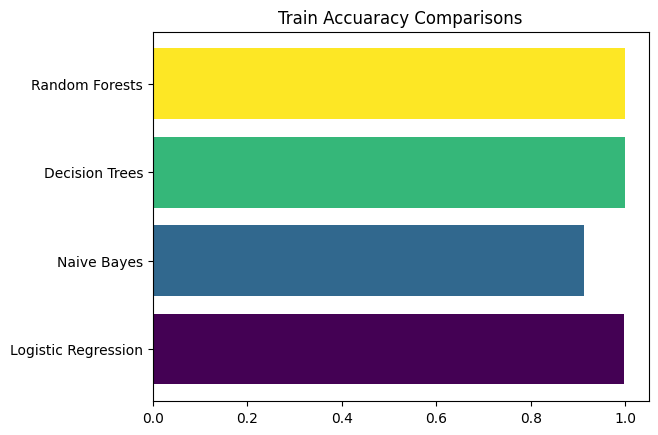

In [13]:
import matplotlib.pyplot as plt
lrScore = lr.score(X_train.toarray(), y_train)

nbScore = nb.score(X_train.toarray(), y_train)

dtScore = dt.score(X_train.toarray(), y_train)

rfScore = rf.score(X_train.toarray(), y_train)

colors = plt.cm.viridis(np.linspace(0, 1, 4))

models = ["Logistic Regression","Naive Bayes","Decision Trees", "Random Forests"]

plt.barh(models, width = [lrScore, nbScore, dtScore, rfScore],
        color = colors)

plt.title("Train Accuaracy Comparisons")

print(f'Logistic Regression Train Accuracy score is : {round(lrScore * 100 ,2)}%')

print(f'\nNaive Bayes Train Accuracy score is : {round(nbScore * 100 , 2)}%')

print(f'\nDecision Tree Train Accuracy score is : {round(dtScore * 100 , 2)}%')

print(f'\nRandom Forest Train Accuracy score is : {round(rfScore * 100 , 2)}%')

Put it simply, when a small number of your tags occupy a large number of your labels associated with your text, then not much training happens on the rest of the "minority" tags to be learned.

Feature Engineering: You can create extra features and metadata to enhance training and learning. For example, you can add a column providing the sentiment of every instance, and/or you can apply topic modeling as an extra attribute (they would be similar to the "tokens" you have put on the dataframe, supporting -and not replacing- the main text attribute).
Lastly, I would not consider it a bad idea to firstly begin with TfidfVectorizer and observe the accuracy there before proceeding to neural networks. If the above is not enough, you can also explore more robust transfer learning and pre-trained models while using deep neural networks.